In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [32]:
iris = pd.read_csv("iris.csv")

In [33]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width   class_iris
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [34]:
iris['class_iris'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class_iris      0
dtype: int64

In [36]:
le = preprocessing.LabelEncoder()

In [37]:
iris['class_iris'] = le.fit_transform(iris['class_iris'])

In [38]:
iris

sepal_length  sepal_width  petal_length  petal_width  class_iris
0             5.1          3.5           1.4          0.2           0
1             4.9          3.0           1.4          0.2           0
2             4.7          3.2           1.3          0.2           0
3             4.6          3.1           1.5          0.2           0
4             5.0          3.6           1.4          0.2           0
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3           2
146           6.3          2.5           5.0          1.9           2
147           6.5          3.0           5.2          2.0           2
148           6.2          3.4           5.4          2.3           2
149           5.9          3.0           5.1          1.8           2

[150 rows x 5 columns]

In [39]:
x = iris.drop(columns = 'class_iris')

In [40]:
x

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [41]:
y = iris.class_iris

In [42]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class_iris, Length: 150, dtype: int32

In [44]:
tts = model_selection.train_test_split

In [45]:
train_x, test_x, train_y, test_y = tts(x, y, test_size = 0.2, random_state = 40)

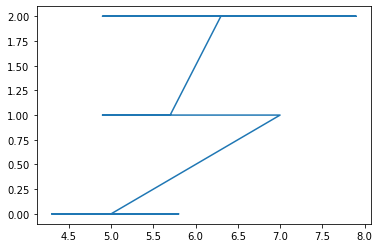

In [49]:
plt.figure(121)
plt.plot(iris.sepal_length, iris.class_iris)

In [60]:
lr = linear_model.LogisticRegression()

In [61]:
lr.fit(train_x, train_y)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
pred = lr.predict(test_x)

In [63]:
pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [64]:
acc = metrics.accuracy_score

In [65]:
score = acc(test_y, pred)

In [66]:
score

1.0

In [67]:
test_y

38     0
66     1
115    2
117    2
89     1
136    2
68     1
94     1
84     1
28     0
90     1
11     0
40     0
126    2
79     1
144    2
123    2
124    2
76     1
59     1
132    2
105    2
53     1
17     0
64     1
18     0
13     0
116    2
9      0
81     1
Name: class_iris, dtype: int32

In [68]:
cm = metrics.confusion_matrix

In [70]:
cm1 = cm(test_y, pred)

In [71]:
cm1

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

In [72]:
f1 = metrics.f1_score

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [84]:
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [85]:
predt = knn.predict(test_x)

In [86]:
predt

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [87]:
acs = acc(test_y, predt)

In [88]:
acs

1.0

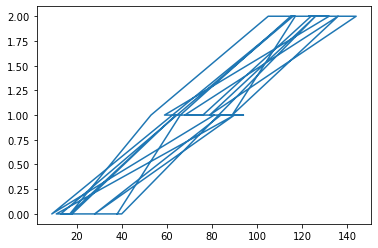

In [89]:
plt.plot(test_y)

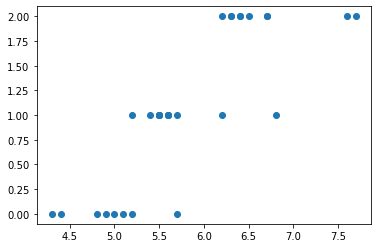

In [93]:
plt.scatter(test_x.sepal_length, predt)